In [2]:
from matplotlib import pyplot as plt
from scipy import signal
import math
import numpy as np

In [24]:
def calculate_gradient_image(img):
    #partial x
    gradient_img_x = np.zeros(img.shape)
    kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    for i in range(3):
        gradient_img_x[:, :, i] = signal.convolve(img[:, :, i], kernel, mode = 'same')
    #partial y
    gradient_img_y = np.zeros(img.shape)
    kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    for i in range(3):
        gradient_img_y[:, :, i] = signal.convolve(img[:, :, i], kernel, mode = 'same')
    #magnitute of gradient
    gradient_img = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for c in range(img.shape[2]):
                gradient_img[i][j][c] =  float(math.sqrt((gradient_img_x[i][j][c]**2) + (gradient_img_y[i][j][c]**2)))
    return gradient_img_y

In [19]:
def generate_gradient_image(img):
    gradient_img = np.zeros(img.shape, dtype = 'uint8')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for c in range(img.shape[2]):
                partial_y = 0
                if (j < img.shape[1] - 1):
                    partial_y = int(img[i][j][c]) - int(img[i][j + 1][c])
                else:
                    partial_y = int(img[i][j - 1][c]) - int(img[i][j][c])
                #parital x
                partial_x = 0
                if (i < img.shape[0] - 1):
                    partial_x = int(img[i][j][c]) - int(img[i + 1][j][c])
                else:
                    partial_x = int(img[i - 1][j][c]) - int(img[i][j][c])
                gradient_img[i][j][c] = math.sqrt(((partial_x**2) + (partial_y**2)) / 2)
    return gradient_img

Name of file:  20181202_135114.jpg


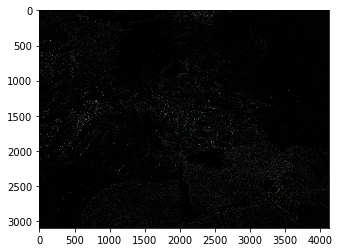

In [20]:
file_name = input("Name of file: ")
img = plt.imread(file_name)
gradient_img = generate_gradient_image(img)
plt.imshow(gradient_img)
ofile_name = file_name.split('.')[0] + '_gradient.' + file_name.split('.')[1]
plt.imsave(ofile_name, gradient_img)